<a href="https://colab.research.google.com/github/YoungHyunKoo/GEE_remote_sensing/blob/main/Week5/5_1_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **[GEO 6083] Remote Sensing Imge Processing - Spring 2024**
# **WEEK 5-1. Deep learning with Earth Engine**

### OBJECTIVES
1. Import earth engine images as numpy arrays
2. Train and test a simple neural network (NN) model with the imported images

Credited by Younghyun Koo (kooala317@gmail.com)

## **Convert Earth Engine image into Xarray format**

In this tutorial, we will train and test a **neural network (NN)** model to filter out cloud coveres in a Landsat 8 imagery. Earth Engine provides its own AI platform ([Earth Engine Vertex AI example](https://developers.google.com/earth-engine/guides/ml_examples)), but this service requires commercial licenses and charges for the access to Google Cloud. Therefore, instead of using the GEE AI platform, we will extract the `ee.Image` into more accessible and Python-compatible array format to conduct advanced machine learning and AI training. In this tutorial, we will export a GEE image into `xarray` format using an external library called `wxee`. `xarray` is a very popular and useful package specialized for processing multi-dimensional array data. You can find more information here: https://xarray.dev/



In [ ]:
# Import ee library
import ee

# Authenticate
ee.Authenticate()

# Initialize with your own project.
ee.Initialize(project = "utsa-spring2024")

In [ ]:
# Import geemap library
import geemap

In [ ]:
# Import geopandas and pandas library
import geopandas
import pandas as pd
import numpy as np

In [ ]:
# Install wxee library (convert ee to xarray)
!pip install wxee

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 7.1 MB/s eta 0:00:00


In [ ]:
# For interactual plot
!pip install ipympl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.8 MB/s eta 0:00:00


In [ ]:
import wxee
import matplotlib.pyplot as plt

In [ ]:
# Target area: San Antonio area
AOI = ee.Geometry.Rectangle(
  [
    [-98.50, 29.20],
    [-98.30, 29.50]
  ]
)

# import image data
dataset = ee.ImageCollection("LANDSAT/LC08/C02/T1_TOA")\
.filterDate('2015-01-01', '2015-12-31')\
.filterMetadata('CLOUD_COVER', 'greater_than', 20) \
.filterMetadata('WRS_ROW', 'equals', 40)\
.filterMetadata('WRS_PATH', 'equals', 27)\
.filterBounds(AOI) \
.sort("CLOUD_COVER")

img = dataset.first().clip(AOI) #mean()#.clip(AOI)

# trueColor = dataset.select(['R', 'G', 'B']);
trueColorVis = {
    'bands': ['B4', 'B3', 'B2'],
    'min': 0.0,
    'max': 0.3,
};

Map = geemap.Map()

Map.centerObject(img, 12);
Map.addLayer(img, trueColorVis, 'True Color')

Map

Map(center=[29.349963674492948, -98.4000000000016], controls=(WidgetControl(options=['position', 'transparent_…

In [ ]:
# Get the information about this image
img.getInfo()

{'type': 'Image',
 'bands': [{'id': 'B1',
   'data_type': {'type': 'PixelType', 'precision': 'float'},
   'dimensions': [975, 744],
   'origin': [2519, 1534],
   'crs': 'EPSG:32614',
   'crs_transform': [30, 0, 463185, 0, -30, 3309615]},
  {'id': 'B2',
   'data_type': {'type': 'PixelType', 'precision': 'float'},
   'dimensions': [975, 744],
   'origin': [2519, 1534],
   'crs': 'EPSG:32614',
   'crs_transform': [30, 0, 463185, 0, -30, 3309615]},
  {'id': 'B3',
   'data_type': {'type': 'PixelType', 'precision': 'float'},
   'dimensions': [975, 744],
   'origin': [2519, 1534],
   'crs': 'EPSG:32614',
   'crs_transform': [30, 0, 463185, 0, -30, 3309615]},
  {'id': 'B4',
   'data_type': {'type': 'PixelType', 'precision': 'float'},
   'dimensions': [975, 744],
   'origin': [2519, 1534],
   'crs': 'EPSG:32614',
   'crs_transform': [30, 0, 463185, 0, -30, 3309615]},
  {'id': 'B5',
   'data_type': {'type': 'PixelType', 'precision': 'float'},
   'dimensions': [975, 744],
   'origin': [2519, 1534

In [ ]:
# Export this image into xarray format (B1-B7)
bands = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7']
arr = img.select(bands).wx.to_xarray(scale = 30, crs = "EPSG:32614", progress = True)

Downloading:   0%|          | 0.00/14.5M [00:00<?, ?iB/s]

In [ ]:
arr

<xarray.Dataset>
Dimensions:      (time: 1, x: 974, y: 744)
Coordinates:
  * time         (time) datetime64[ns] 2015-09-06T17:03:15
  * x            (x) float64 5.388e+05 5.388e+05 ... 5.679e+05 5.68e+05
  * y            (y) float64 3.264e+06 3.264e+06 ... 3.241e+06 3.241e+06
    spatial_ref  int64 0
Data variables:
    B1           (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan
    B2           (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan
    B3           (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan
    B4           (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan
    B5           (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan
    B6           (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan
    B7           (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan
Attributes:
    AREA_OR_POINT:           Area
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1
    _FillValue:              -32768.0
    scale_factor:            1.0
    add_offset:              0.0

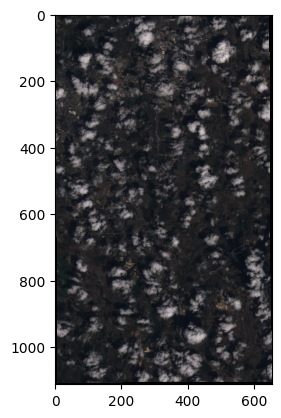

In [ ]:
# Show RGB true color image
RGB = np.dstack([arr['B4'][0], arr['B3'][0], arr['B2'][0]])
plt.imshow(RGB)

## **Prepare training datasets**

The NN model is fully **data-driven**, which means that this model learns how to distinguish clouds and non-cloud area using given sets of data. Therefore, in order to train the NN model, we need a lot of labeled training datasets. In this section, we will manually digitize some cloud and non-cloud areas.

In [ ]:
# Define a function that extracts band information for a specific point
def derive_inputs(data, coord, bands):
  # data: xarray format of the input image
  # coord: x and y pixel location of the selected point
  # bands: input bands (B1-B7)

  # Output - dataframe format
  df = pd.DataFrame({})

  if len(data) > 0:

    for band in bands:

      df.loc[0, band] = data[band][0][(coord[1], coord[0])]

  return df

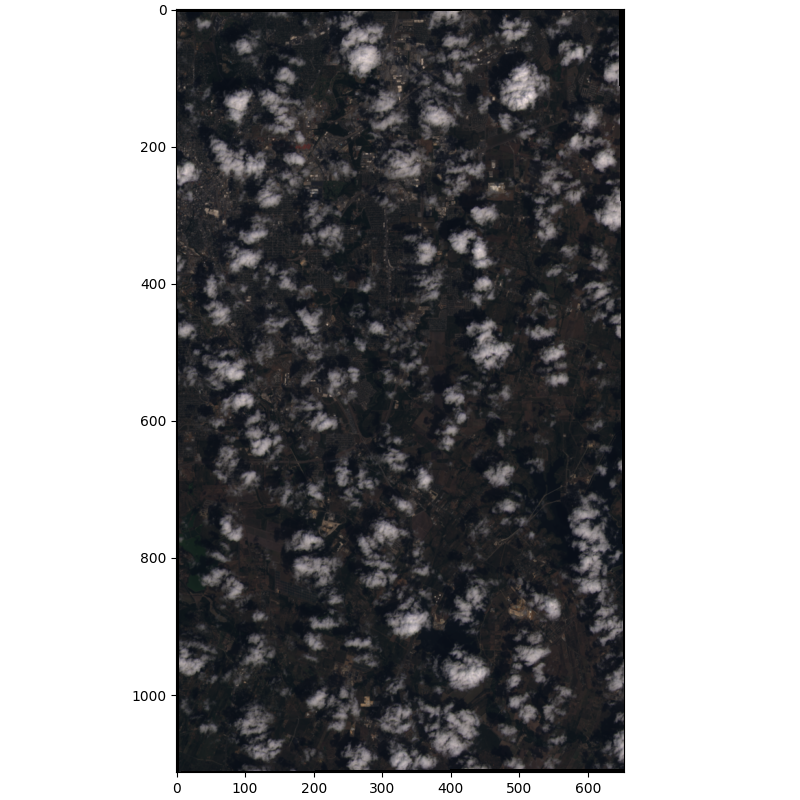

In [ ]:
%matplotlib widget
fig, ax = plt.subplots(constrained_layout=True, figsize = (8, 8))

plt.imshow(RGB)

# Function for storing and showing the clicked values
coord1 = []
coord2 = []

def onclick(event):

    global coord1, coord2, cloud

    x = int(event.xdata)
    y = int(event.ydata)

    if event.button == 1: # Left click (clouds)
        coord1.append((x, y))
        ax.scatter(x, y, marker = "x", color = "r")
        df = derive_inputs(arr, (x,y), bands)
        df['cloud'] = 1
        cloud = pd.concat([cloud, df]).reset_index(drop = True)

    elif event.button == 3: # Right click (non-clouds)
        coord2.append((x, y))
        ax.scatter(x, y, marker = "x", color = "b")
        df = derive_inputs(arr, (x,y), bands)
        df['cloud'] = 0
        cloud = pd.concat([cloud, df]).reset_index(drop = True)

    # berg.to_csv(filepath + "\\" + filename)

    fig.canvas.draw() #redraw the figure

cloud = pd.DataFrame({})

fig.canvas.mpl_connect('button_press_event', onclick)

plt.show()

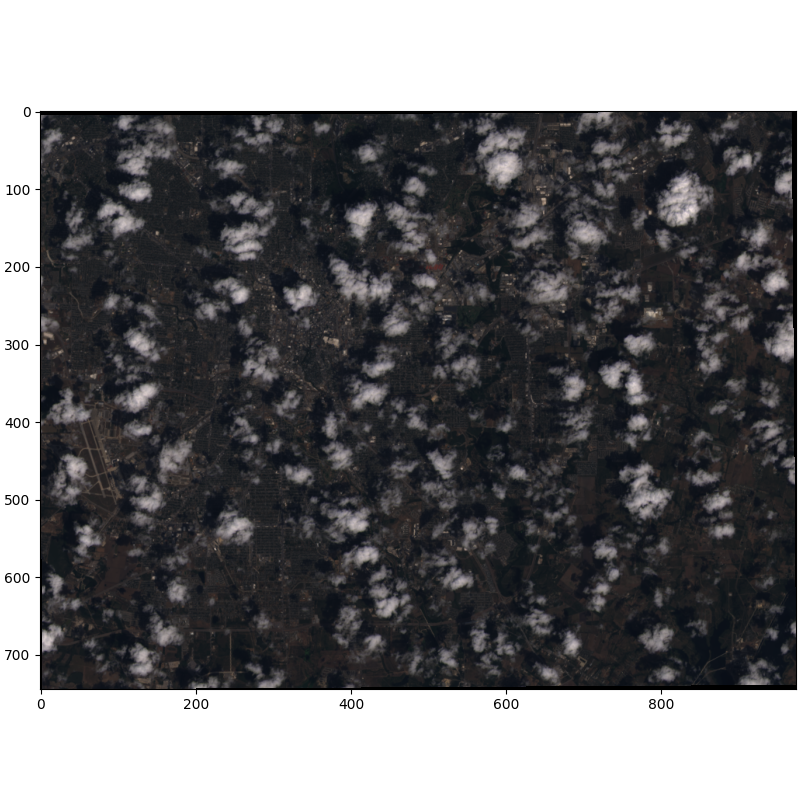

In [ ]:
%matplotlib widget
fig, ax = plt.subplots(constrained_layout=True, figsize = (8, 8))

plt.imshow(RGB)

# Function for storing and showing the clicked values
coord1 = []
coord2 = []

def onclick(event):

    global coord1, coord2, cloud, shadow

    x = int(event.xdata)
    y = int(event.ydata)

    if event.button == 1: # Left click (clouds)
        coord1.append((x, y))
        ax.scatter(x, y, marker = "x", color = "r")
        df = derive_inputs(arr, (x,y), bands)
        df['cloud'] = 2
        shadow = shadow.append(df).reset_index(drop = True)

    # berg.to_csv(filepath + "\\" + filename)

    fig.canvas.draw() #redraw the figure

shadow = pd.DataFrame({})

fig.canvas.mpl_connect('button_press_event', onclick)

plt.show()

In [ ]:
cloud

B1        B2        B3        B4        B5        B6        B7  cloud
0  0.127978  0.103391  0.084799  0.059143  0.300295  0.143292  0.064395      1
1  0.129047  0.106667  0.090772  0.070763  0.252934  0.190165  0.090609      1
2  0.132579  0.111222  0.096279  0.085311  0.281750  0.205503  0.106203      1
3  0.608631  0.621645  0.592085  0.616486  0.693802  0.540099  0.411517      0
4  0.595803  0.609375  0.576887  0.602914  0.691664  0.547280  0.441705      0
5  0.665846  0.689875  0.678813  0.716902  0.816644  0.612257  0.456415      0

In [ ]:
# X: input data (band values); y: output data (binary classification of cloud and non-cloud)
X = cloud[bands]
y = cloud['cloud']

In [ ]:
X

B1        B2        B3        B4        B5        B6        B7
0   0.733936  0.758361  0.759615  0.798518  0.888987  0.693640  0.529735
1   0.719017  0.743325  0.737306  0.777486  0.872859  0.682462  0.527132
2   0.590017  0.598290  0.579977  0.601450  0.667008  0.527294  0.400944
3   0.698078  0.719110  0.720713  0.752876  0.837234  0.654296  0.494249
4   0.738119  0.762381  0.779694  0.823383  0.920267  0.732519  0.549743
..       ...       ...       ...       ...       ...       ...       ...
95  0.156771  0.144361  0.147684  0.159234  0.340173  0.357022  0.206154
96  0.173294  0.157677  0.164649  0.163928  0.315610  0.283935  0.181753
97  0.157863  0.138900  0.131417  0.123957  0.300899  0.231345  0.139434
98  0.137296  0.116800  0.106876  0.087681  0.324720  0.233576  0.124445
99  0.165671  0.153308  0.145732  0.146778  0.331226  0.261835  0.164904

[100 rows x 7 columns]

In [ ]:
y

0     1
1     1
2     1
3     1
4     1
     ..
95    0
96    0
97    0
98    0
99    0
Name: cloud, Length: 100, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

# Split train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

## **Train neural network**

Neural Network, especially **Multi-layer Perceptron (MLP)** in this case, is a supervised learning algorithm that learns a function by training on a dataset. The process of creating a neural network begins with the **perceptron (or neural)**. In simple terms, the perceptron receives inputs, multiplies them by some weights, and then passes them into an activation function (such as logistic, relu, tanh, identity) to produce an output. Neural networks are created by adding the layers of these perceptrons together, known as a multi-layer perceptron. There are three layers of a neural network - the input, hidden, and output layers. The input layer directly receives the data, whereas the output layer creates the required output. The layers in between are known as hidden layers where the intermediate computation takes place. [Multilayer perceptron](https://scikit-learn.org/stable/modules/neural_networks_supervised.html)

https://dev.to/dattran1999/how-neural-networks-work-dma

<img src = "https://www.ibm.com/content/dam/connectedassets-adobe-cms/worldwide-content/cdp/cf/ul/g/3a/b8/ICLH_Diagram_Batch_01_03-DeepNeuralNetwork.component.simple-narrative-xl.ts=1708454686214.png/content/adobe-cms/us/en/topics/neural-networks/jcr:content/root/table_of_contents/body/content_section_styled/content-section-body/simple_narrative_2144712998/image" width = 600>

<img src = "https://res.cloudinary.com/practicaldev/image/fetch/s--nlat4t7K--/c_limit%2Cf_auto%2Cfl_progressive%2Cq_auto%2Cw_880/https://pythonmachinelearning.pro/wp-content/uploads/2017/09/Single-Perceptron.png.webp" width = 600>

In [ ]:
# Dependencies: Import keras package
import keras
from keras.models import Sequential
from keras.layers import Dense

# Design a neural network
model = Sequential()
model.add(Dense(10, input_dim=7, activation='ReLU'))
model.add(Dense(10, activation='ReLU'))
model.add(Dense(1, activation='sigmoid'))

*** NOTE ***
Various types of activation functions:

<img src = "https://aman.ai/primers/ai/assets/activation/1.png" width = 500>

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                80        
                                                                 
 dense_10 (Dense)            (None, 10)                110       
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 201 (804.00 Byte)
Trainable params: 201 (804.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile model: loss function, gradient optimizer, etc.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])

<img src = "https://miro.medium.com/v2/resize:fit:1400/format:webp/1*SCz0aTETjTYC864Bqjt6Og.png" width = 600>

In [ ]:
# Train model: set up some parameters, e.g., epochs, batch size, etc.
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=100, batch_size=16)

Epoch 1/100
4/4 [==============================] - 1s 96ms/step - loss: 0.7039 - accuracy: 0.5167 - val_loss: 0.7005 - val_accuracy: 0.5000
Epoch 2/100
4/4 [==============================] - 0s 15ms/step - loss: 0.6999 - accuracy: 0.4833 - val_loss: 0.6962 - val_accuracy: 0.4500
Epoch 3/100
4/4 [==============================] - 0s 13ms/step - loss: 0.6946 - accuracy: 0.5000 - val_loss: 0.6922 - val_accuracy: 0.5750
Epoch 4/100
4/4 [==============================] - 0s 18ms/step - loss: 0.6906 - accuracy: 0.7000 - val_loss: 0.6882 - val_accuracy: 0.8000
Epoch 5/100
4/4 [==============================] - 0s 24ms/step - loss: 0.6860 - accuracy: 0.8333 - val_loss: 0.6843 - val_accuracy: 0.7500
Epoch 6/100
4/4 [==============================] - 0s 14ms/step - loss: 0.6823 - accuracy: 0.7667 - val_loss: 0.6804 - val_accuracy: 0.6750
Epoch 7/100
4/4 [==============================] - 0s 17ms/step - loss: 0.6777 - accuracy: 0.7667 - val_loss: 0.6767 - val_accuracy: 0.6000
Epoch 8/100
4/4 [===

In [ ]:
# Check final test accuracy
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

2/2 - 0s - loss: 0.0845 - accuracy: 1.0000 - 36ms/epoch - 18ms/step


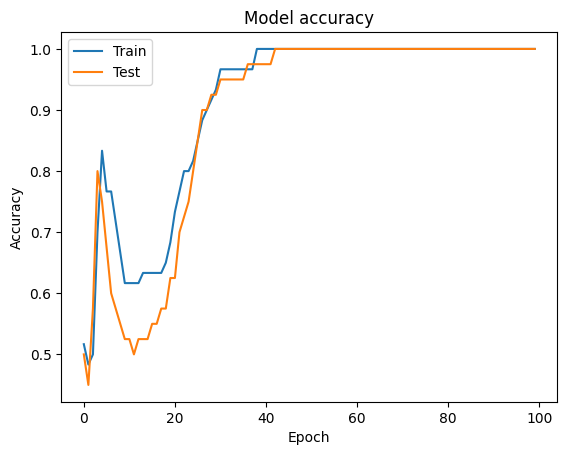

In [ ]:
# Make matplotlib inactive mode
%matplotlib inline

# Draw learning plot
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
def predict_cloud(data, model, bands):
  # data: should be xarray with attributes name
  # model: keras NN model that is already trained
  # bands: list of bands (attributes of xarray) to be used as input features

  # Initialize the output result into 0
  result = np.zeros((arr.y.shape[0], arr.x.shape[0]))

  # Get all pixel values as a single dataframe (initialize dataframe)
  x_input = pd.DataFrame(columns = bands)

  # Assign pixel values to dataframe
  for b in bands:
    x_input[b] = data[b][0].values.flatten()

  # Predict cloud probability using NN model
  result0 = model.predict(x_input)

  # Reshape the tabular data to grid format (same gridsize with the original array)
  result0 = result0.reshape((data.y.shape[0], data.x.shape[0]))

  # Assign binary values (0 or 1) to result (threshold 0.5)
  result[result0 > 0.5] = 1

  return result


In [ ]:
# Apply model to the entire image
result = predict_cloud(arr, model, bands)

22646/22646 [==============================] - 34s 1ms/step


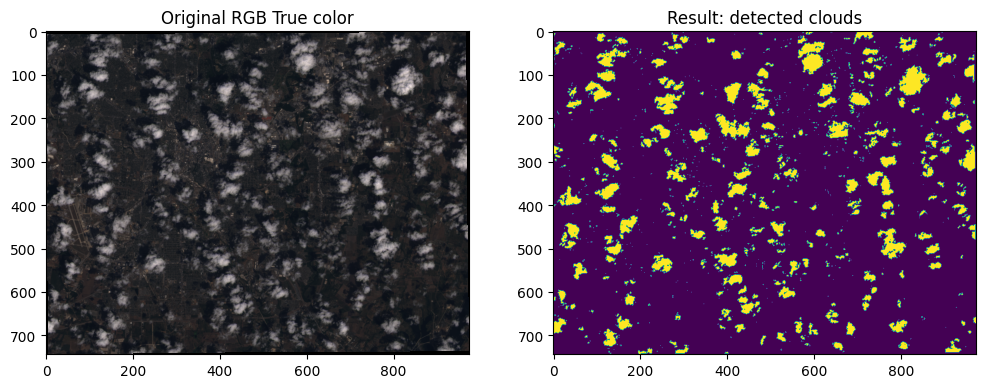

In [ ]:
%matplotlib inline
fig, ax = plt.subplots(1,2,figsize = (12,5))
ax[0].imshow(RGB, vmin = 0.0, vmax = 0.2)
ax[0].set_title("Original RGB True color")
ax[1].imshow(result)
ax[1].set_title("Result: detected clouds")
plt.show()

## References
- https://wxee.readthedocs.io/en/latest/
- https://www.tensorflow.org/tutorials